# Assignment 1

## 1. Theory

#### 1.

###### a)

In [5]:
import numpy as np

In [15]:
X = np.array([[-2], [-5], [-3], [0], [-8], [-2], [1], [5], [-1], [6]])
X = np.c_[np.ones(len(X)),X].astype(int)
X = np.array(X)
Y = np.array([[1], [-4], [1], [3], [11], [5], [0], [-1], [3], [1]])
print(X)
print(Y)

[[ 1  1  1  1  1  1  1  1  1  1]
 [-2 -5 -3  0 -8 -2  1  5 -1  6]]
[[ 1]
 [-4]
 [ 1]
 [ 3]
 [11]
 [ 5]
 [ 0]
 [-1]
 [ 3]
 [ 1]]


In [19]:
np.linalg.inv(X.T @ X) @ X.T @ Y

array([[ 1.62523306],
       [-0.41640771]])

##### b)

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
reg = LinearRegression().fit(X, Y)
print(reg.coef_)
print(reg.intercept_)

[[ 0.         -0.41640771]]
[1.62523306]


#### 2.

##### a)

In [22]:
from sympy import symbols, diff

In [25]:
x1, x2 = symbols('x1 x2', real=True)
f = (x1 + x2 -2)**2
diff(f,x1)

2*x1 + 2*x2 - 4

##### b)

In [2]:
import matplotlib as plt

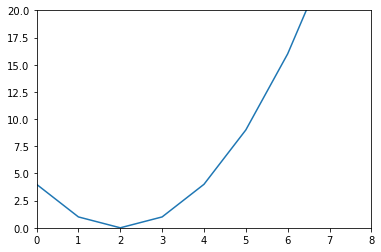

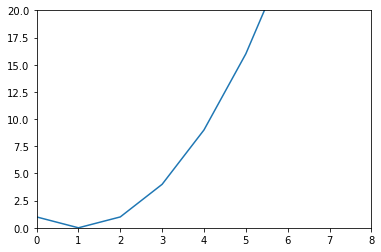

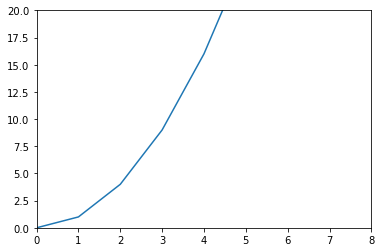

In [34]:
def graph(formula):
    x1 = np.array(range(0, 20))
    J = eval(formula)
    plt.plot(x1,J)
    plt.ylim(0, 20)
    plt.xlim(0,8)
    plt.show()
    
# x2 = 0
#J = (x1 - 2)**2
graph('(x1 - 2)**2')

# x2 = 1
#J = (x1 - 1)**2
graph('(x1 - 1)**2')

# x2 = 2
#J = (x1)**2
graph('(x1)**2')

##### c)

In [ ]:
x1 + x2 - 2 = 0
x1 + x2 = 2
# This condition has to be true, so any value that satisfies
# this condition would minimise J

## 2. Closed Form Linear Regression

In [162]:
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import seaborn as sb # I'm not using this for the assignment, this is just to get a feel for the data

In [163]:
#1 Reads in the data, ignoring the first row (header) and first column (index)
df = pd.read_csv('x06Simple.csv')
del df['Index']

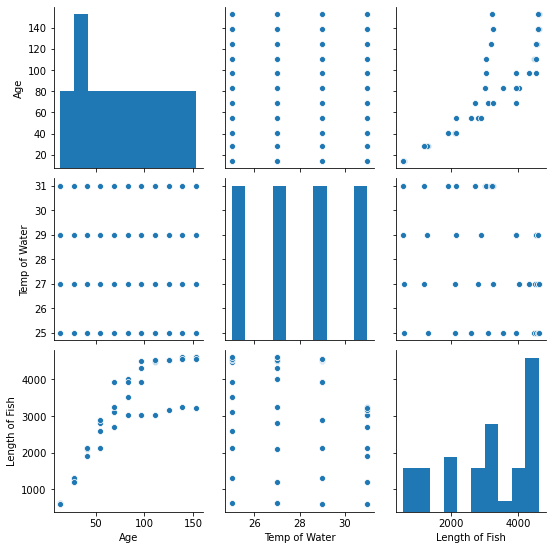

In [164]:
sb.pairplot(df) # I'm not using this for the assignment, this is just to get a feel for the data

In [165]:
#2 Randomizes the data
df = df.sample(frac=1)

In [166]:
#3 Selects the first 2/3 (round up) of the data for training and the remaining for testing
splt = np.random.rand(len(df)) < 0.67
train_df = df[splt]
test_df = df[~splt]

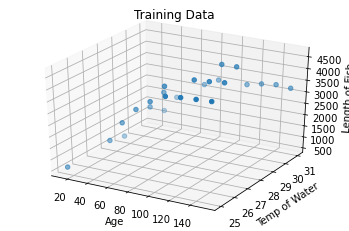

In [13]:
fig = plt.figure().gca(projection='3d')
fig.scatter(train_df['Age'], train_df['Temp of Water'], train_df['Length of Fish'])
fig.set_title('Training Data')
fig.set_xlabel('Age')
fig.set_ylabel('Temp of Water')
fig.set_zlabel('Length of Fish')
plt.show()

In [168]:
#4 Standardizes the data (except for the last column of course) using the training data
age_mean = np.average(train_df['Age'])
age_stddev = np.std(train_df['Age'], ddof=1)
temp_mean = np.average(train_df['Temp of Water'])
temp_stddev = np.std(train_df['Temp of Water'], ddof=1)

print(age_mean)
print(age_stddev)
print(temp_mean)
print(temp_stddev)

82.78125
47.34004263936371
27.8125
2.206113207401417


In [169]:
X_train = train_df[['Age', 'Temp of Water']]
X_test = test_df[['Age', 'Temp of Water']]

X_train['Age'] = X_train['Age'].apply(lambda age_train: (age_train - age_mean) / age_stddev)
X_train['Temp of Water'] = X_train['Temp of Water'].apply(lambda temp_train: (temp_train - temp_mean) / temp_stddev)

X_test['Age'] = X_test['Age'].apply(lambda age_test: (age_test - age_mean) / age_stddev)
X_test['Temp of Water'] = X_test['Temp of Water'].apply(lambda temp_test: (temp_test - temp_mean) / temp_stddev)

Y_train = train_df['Length of Fish']
Y_test = test_df['Length of Fish']

s:\python\3.7.7\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
s:\python\3.7.7\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
s:\python\3.7.7\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

,Age,Temp of Water
14,-0.586845,-0.368295
42,1.187552,1.444849
5,0.004621,-1.274867
1,-1.157186,-1.274867
31,1.187552,0.538277
29,0.596086,0.538277
28,0.300354,0.538277
37,-0.291112,1.444849
24,-0.882577,0.538277
2,-0.882577,-1.274867


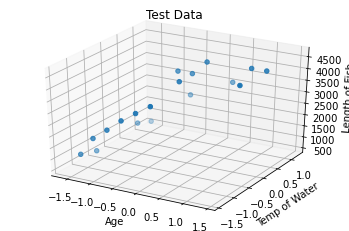

In [14]:
fig = plt.figure().gca(projection='3d')
fig.scatter(X_test['Age'], X_test['Temp of Water'], Y_test, 'bo')
fig.set_title('Test Data')
fig.set_xlabel('Age')
fig.set_ylabel('Temp of Water')
fig.set_zlabel('Length of Fish')
plt.show()

In [171]:
#5 Computes the closed-form solution of linear regression
X = np.c_[np.ones(len(X_train)),X_train]
X = np.array(X)
Y = np.array(Y_train)

In [172]:
thetas = np.linalg.inv(X.T @ X) @ X.T @ Y
thetas

array([3099.21875   , 1245.108602  , -240.18595553])

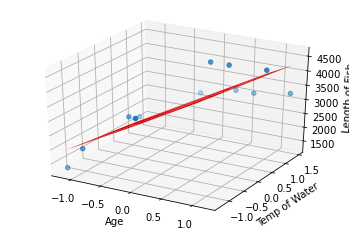

In [173]:
#6 Applies the solution to the testing samples
def y_compute(X1, X2, thetas):
    return (thetas[0] + (thetas[1] * X1) + (thetas[2] * X2))

Y_computed = []

for index, row in test_df[['Age', 'Temp of Water']].iterrows():
    X1 = X_test['Age'][index]
    X2 = X_test['Temp of Water'][index]
    Y = y_compute(X1, X2, thetas)
    Y_computed.append([Y])

Y_computed =  np.array(Y_computed)
Y_computed =  Y_computed.reshape(X_test['Age'].shape)
fig = plt.figure().gca(projection='3d')
fig.scatter(X_test['Age'], X_test['Temp of Water'], Y_test, 'bo')
fig.set_xlabel('Age')
fig.set_ylabel('Temp of Water')
fig.set_zlabel('Length of Fish')

# fig.scatter(X_test['Age'], X_test['Temp of Water'], Y_computed, 'ro')
# fig.plot_wireframe(X_test['Age'], X_test['Temp of Water'], Y_computed, rstride=1, cstride=1)

fig.plot_trisurf(np.array(X_test['Age']), np.array(X_test['Temp of Water']), Y_computed, color='red')

plt.show()

In [174]:
#7 Computes theroot mean squared error
error_squared_sum = 0
# test_std_df = 

for index, row in test_df.iterrows():
    X1 = X_test['Age'][index]
    X2 = X_test['Temp of Water'][index]
    Y_actual = row['Length of Fish']
    Y_predicted = y_compute(X1, X2, thetas)
    error_squared = (Y_actual - Y_predicted)**2
    error_squared_sum += error_squared
    
# for index, row in test_df[['Age', 'Length of Fish']].iterrows():
#     x = X_test_std[index] # row['Age']
#     y_act = row['Length of Fish']
#     y_pred = y_compute(x)
#     error_squared = (y_act - y_pred)**2
#     error_squared_sum += error_squared
#     print(x, y_act, y_pred)
    
mean_error_squared_sum = error_squared_sum / test_df.shape[0]
root_mean_error_squared_sum = mean_error_squared_sum**(0.5)
root_mean_error_squared_sum

575.1701277019515

## 3. Locally-Weighted Linear Regression

In [1]:
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import seaborn as sb # I'm not using this for the assignment, this is just to get a feel for the data

In [2]:
#1 Read in the data, ignoring the first row (header) and first column (index
df = pd.read_csv('x06Simple.csv')
del df['Index']

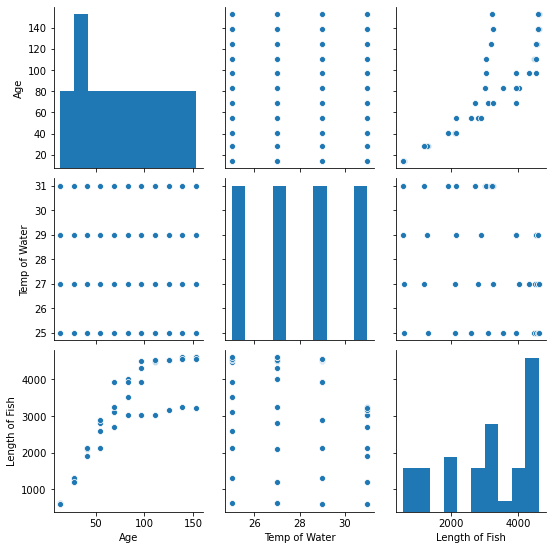

In [3]:
sb.pairplot(df)

In [4]:
#2 Randomize the data
df = df.sample(frac=1)

In [5]:
#3 Select the first 2/3 of the data for training and the remaining for testing
splt = np.random.rand(len(df)) < 0.67
train_df = df[splt]
test_df = df[~splt]

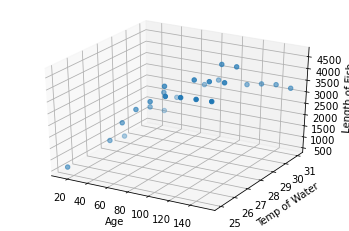

In [6]:
fig = plt.figure().gca(projection='3d')
fig.scatter(train_df['Age'], train_df['Temp of Water'], train_df['Length of Fish'])
fig.set_xlabel('Age')
fig.set_ylabel('Temp of Water')
fig.set_zlabel('Length of Fish')
plt.show()

In [10]:
#4 Standardizes the data (except for the last column of course) using the training data
age_mean = np.average(train_df['Age'])
age_stddev = np.std(train_df['Age'], ddof=1)
temp_mean = np.average(train_df['Temp of Water'])
temp_stddev = np.std(train_df['Temp of Water'], ddof=1)

print(age_mean)
print(age_stddev)
print(temp_mean)
print(temp_stddev)

88.0
45.41981946243292
28.23076923076923
2.2681744607977987


In [23]:
X_train = train_df[['Age', 'Temp of Water']]
X_test = test_df[['Age', 'Temp of Water']]

X_train['Age'] = X_train['Age'].apply(lambda age_train: (age_train - age_mean) / age_stddev)
X_train['Temp of Water'] = X_train['Temp of Water'].apply(lambda temp_train: (temp_train - temp_mean) / temp_stddev)

X_test['Age'] = X_test['Age'].apply(lambda age_test: (age_test - age_mean) / age_stddev)
X_test['Temp of Water'] = X_test['Temp of Water'].apply(lambda temp_test: (temp_test - temp_mean) / temp_stddev)

Y_train = train_df['Length of Fish']
Y_test = test_df['Length of Fish']

s:\python\3.7.7\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
s:\python\3.7.7\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
s:\python\3.7.7\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

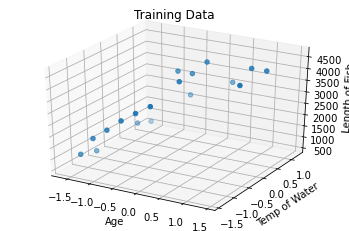

In [24]:
fig = plt.figure().gca(projection='3d')
fig.scatter(X_test['Age'], X_test['Temp of Water'], Y_test, 'bo')
fig.set_title('Training Data')
fig.set_xlabel('Age')
fig.set_ylabel('Temp of Water')
fig.set_zlabel('Length of Fish')
plt.show()

In [52]:
#5
X_tr = np.c_[np.ones(len(X_train)),X_train]
X_tr = np.array(X_tr)
X_ts = np.c_[np.ones(len(X_test)),X_test]
X_ts = np.array(X_ts)
Y_tr = np.array(Y_train)
Y_ts = np.array(Y_test)

# X_tr = np.c_[np.ones(len(X_train_std)),X_train_std]
# X_tr = np.array(X_tr)
# Y_tr = np.array(Y_train)
# X_ts = np.c_[np.ones(len(X_test_std)),X_test_std]
# X_ts = np.array(X_ts)
X_ts

array([[ 1.        , -0.72655507, -1.42439186],
       [ 1.        , -1.32100921,  0.33914092],
       [ 1.        , -0.41831958, -1.42439186],
       [ 1.        ,  1.43109331,  0.33914092],
       [ 1.        , -0.41831958,  0.33914092],
       [ 1.        ,  1.43109331, -0.54262547],
       [ 1.        , -0.1100841 , -1.42439186],
       [ 1.        ,  0.19815138,  0.33914092],
       [ 1.        , -1.32100921, -1.42439186],
       [ 1.        , -1.03479055, -1.42439186],
       [ 1.        , -1.6292447 , -0.54262547],
       [ 1.        , -0.1100841 ,  0.33914092],
       [ 1.        , -1.6292447 ,  1.22090731],
       [ 1.        ,  0.19815138, -0.54262547],
       [ 1.        ,  0.19815138, -1.42439186],
       [ 1.        , -0.72655507,  1.22090731],
       [ 1.        ,  0.19815138,  1.22090731],
       [ 1.        ,  1.12285783,  0.33914092]])

In [59]:
def L2(a_x1, a_x2, b_x1, b_x2):
    return (((a_x1 - b_x1)**2) + ((a_x2 - b_x2)**2))**0.5

def Beta(a_x1, a_x2, b_x1, b_x2,k):
    from math import e
    return e**(-(L2(a_x1, a_x2, b_x1, b_x2))/(k**2))

def y_compute(X1, X2, thetas):
    return (thetas[0] + (thetas[1] * X1) + (thetas[2] * X2))

all_thetas = []
Weights = []
error_squared_sum = 0
for test_point, Y_actual in zip(X_ts, Y_ts):
    betas = []
    for train_point in X_tr:
        betas.append(Beta(train_point[1],
                          train_point[2],
                          test_point[1],
                          test_point[2],
                          1))
    W = np.diag(betas)
    thetas = np.linalg.inv(X_tr.T @ W @ X_tr) @ X_tr.T @ W @ Y_tr
    Y_predicted = y_compute(test_point[1], test_point[2], thetas)
    error_squared = (Y_actual - Y_predicted)**2
    error_squared_sum += error_squared
    all_thetas.append(thetas)
    Weights.append(W)

In [60]:
#6
mean_error_squared_sum = error_squared_sum / test_df.shape[0]
root_mean_error_squared_sum = mean_error_squared_sum**(0.5)
root_mean_error_squared_sum

481.08866786216026